## Problem 1 

Suppose the globe tossing data (Chapter 2) had turned out to be 4 waterin 15 tosses. Construct the posterior distribution, using grid approximation. Use the same flat prior as in the book.

---

We toss the globe 15 times. Each time, theres a probability $p$ that the result will be $W$, and probability $1-p$ it will be $L$. 
The order of results doesn't matter, so we assume that the result was 
$$ 
WWWWLLLLLLLLLLL
$$

Bayes theorem states that 
$$
P(A|B) = \frac{P(B|A)P(A)}{P(B)}
$$

In this case, A is the parameter we're after ($p$), and B is the data. When we see the first $W$, we update our beliefs about the probability distribution of $p$. 

$P(B|A)$ is the probability of seeing a particular result given $p$. $P(A)$ is the probability distribution of $p$.

Let's begin the computation using the grid approximation. Let's create a grid for $p$:

In [2]:
GRID_SIZE=100
import numpy as np
p_grid = np.linspace(0, 1, num=GRID_SIZE)

Our prior is the (normalized) uniform distibution over $[0, 1]$:

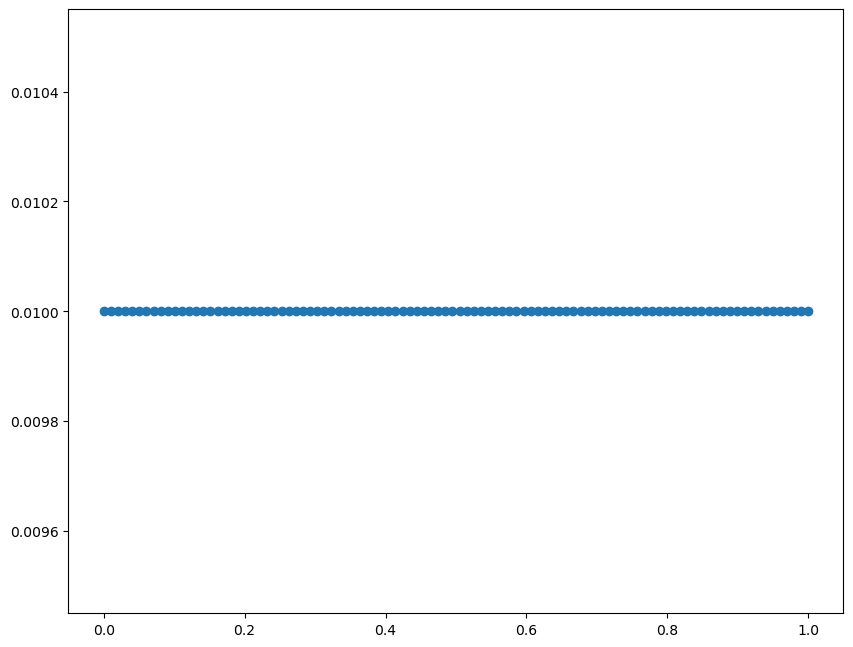

In [3]:
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['figure.dpi'] = 100


prior = np.ones(GRID_SIZE)/GRID_SIZE 
plt.scatter(p_grid, prior)
plt.show()

We have: 

$$ 
P(\text{p} \mid W) =\frac{P(W \mid \text{p}) P(\text{p})}{P(W)}
$$

$P(W \mid p)$ is the probability of seeing water given $p$, that is just $p$.

$P(p)$ is the probability for each value of $p$, in this case this is our prior. 

$P(W)$ is just a normalization constant. It represents the probability of getting $W$ _irrespective_ of $p$. 
This means that we consider all the ways in which we can get $W$. We use our prior to do a "weighted average": 
for all $p$, with probability $P(p)$, we get the result $W$ with probability $p$. Assuming the size of the grid is $G$, we have:
$$
P(W) = \sum_{i=1}^{G} P(p_i) p_i = \frac{1}{G} \sum_{i=1}^{G} p_i
$$

Note that because of the way `np.linspace` works (it returns $N$ evenly spaced _points_ in an interval), the form of $p_i$ is slightly awkward: 
$$ 
p_i = \frac{i-1}{G-1}
$$

Finally, we end up with 

$$
P(W) = \frac{1}{G(G-1)} \sum_{i=1}^G (i-1) = \frac{1}{2}
$$

*Yaaay!* Our normalization factor doesn't even depend on any of the parameters. 

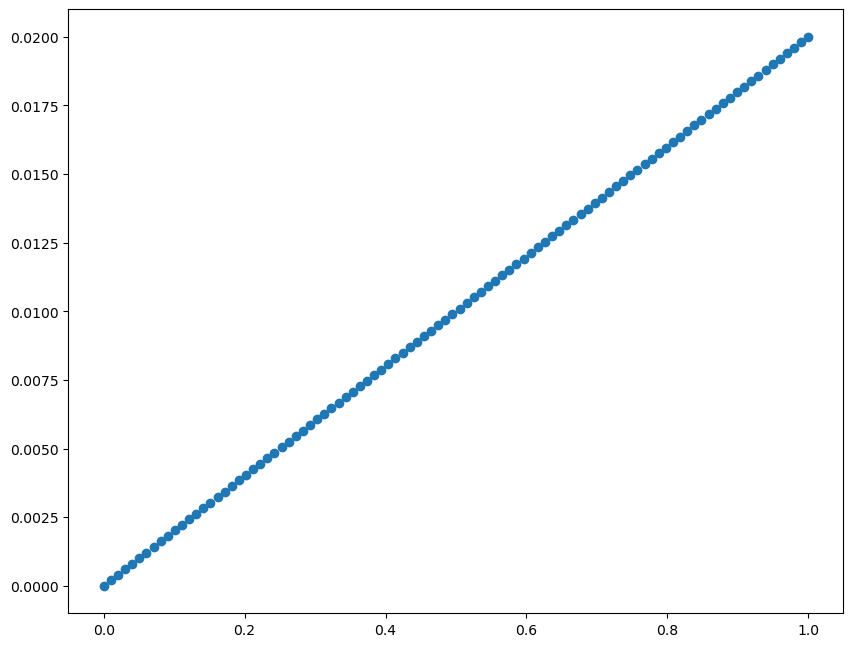

In [68]:
posterior = p_grid * prior / sum(p_grid * prior)
plt.scatter(p_grid, posterior)
plt.show()

We can apply this process iteratively. Each time, our last posterior becomes our new prior:

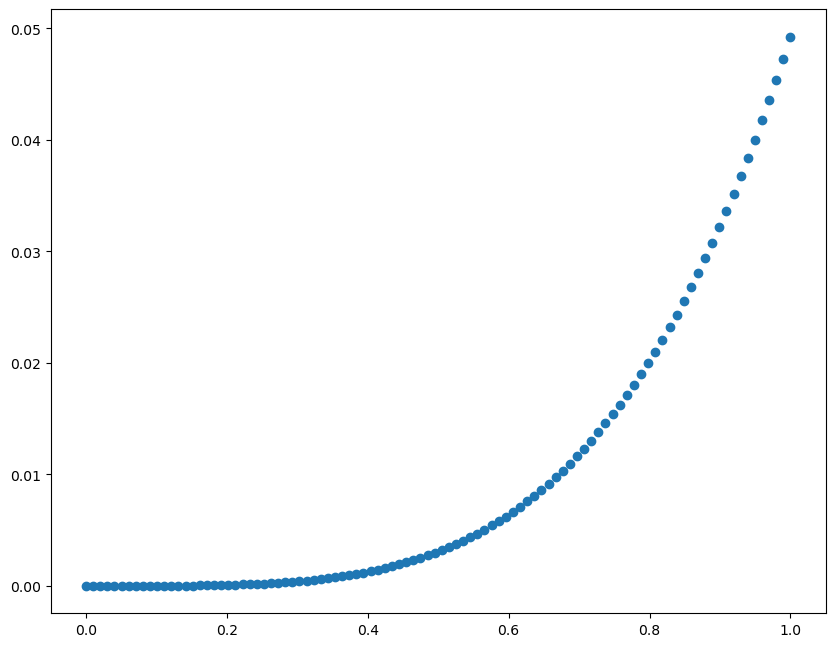

In [69]:
def bayes_forward(prior, probability_of_result):
    return prior * probability_of_result / np.sum(prior * probability_of_result)

posterior = bayes_forward(posterior, p_grid) # We just saw W, whose probability given p is p_grid
posterior = bayes_forward(posterior, p_grid) # W again 
posterior = bayes_forward(posterior, p_grid) # W once more!


plt.scatter(p_grid, posterior)
plt.show()

After seeing $W$ four times, we're pretty sure the world is all water. What happens when we see our first $L$?

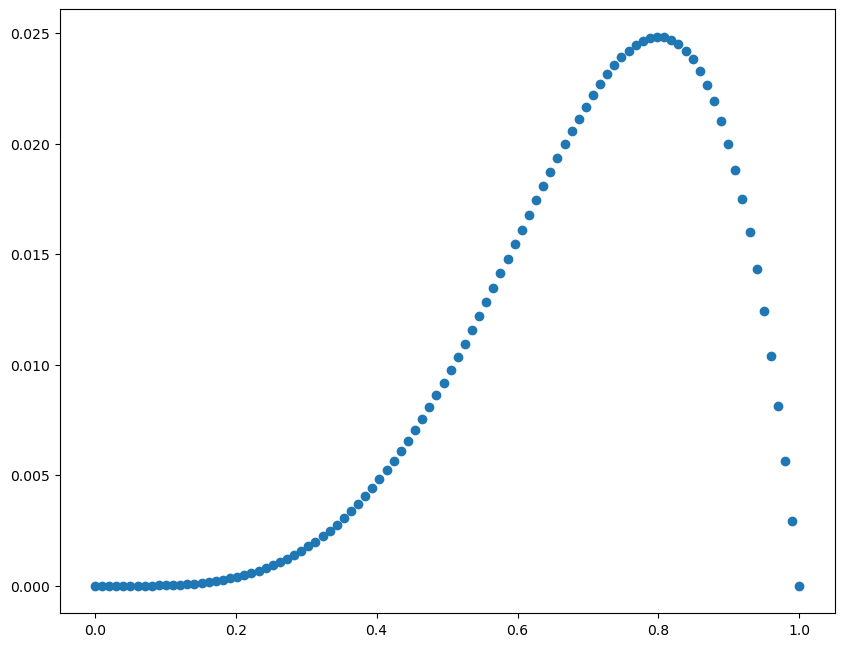

In [70]:
posterior = bayes_forward(posterior, 1-p_grid) # Probability of seeing L given p is 1-p, i.e. 1-p_grid

plt.scatter(p_grid, posterior)
plt.show()

Our world view is shaken 🙀. We now think there might be some land after all. After 2 more $L$'s: 

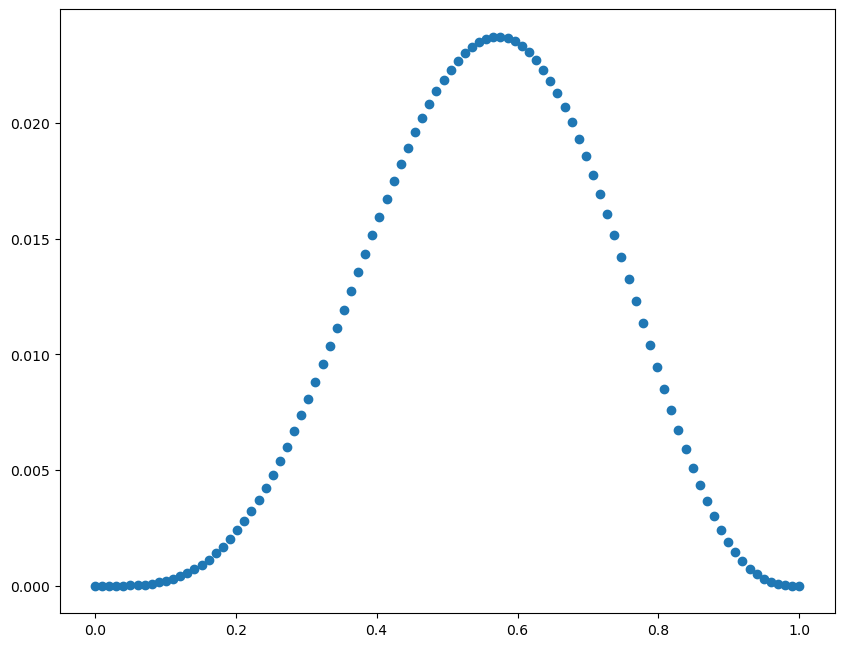

In [71]:
posterior = bayes_forward(posterior, 1-p_grid) # Got an L
posterior = bayes_forward(posterior, 1-p_grid) # L again

plt.scatter(p_grid, posterior)
plt.show()

Notice that our curve now peaks at some $p$ slightly greater than 0.5. This is because we've seen more water than land (4 vs 3). If we see one more land, we expect the curve to be symmetrical around 0.5: 

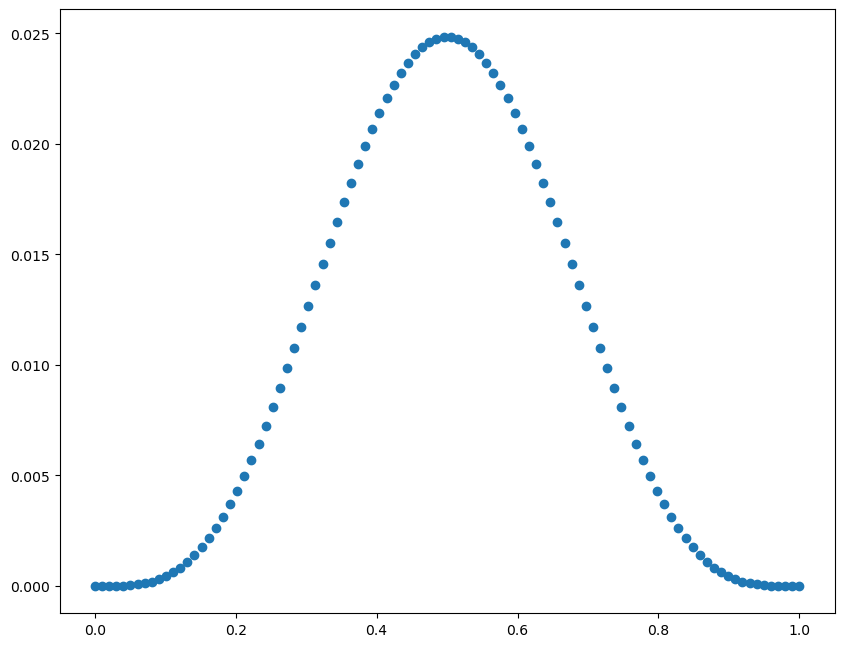

In [72]:
posterior = bayes_forward(posterior, 1-p_grid) # Got an L
plt.scatter(p_grid, posterior)
plt.show()

Great, everything makes sense. Finally, let's see what happens after we see 7 more $L$'s, for a total of 15 tosses: 

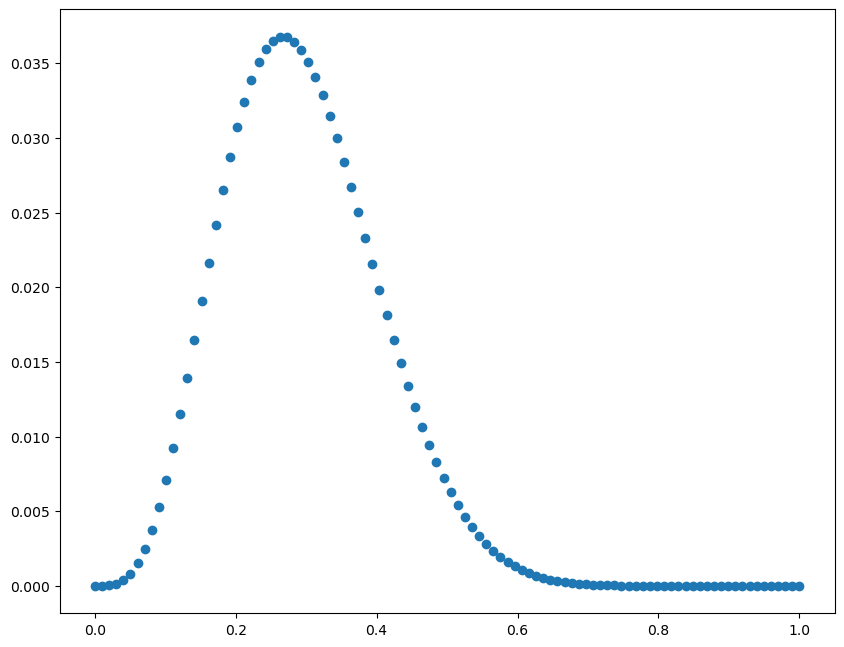

In [73]:
for _ in range(7):
    posterior = bayes_forward(posterior, 1-p_grid) # Got an L
plt.scatter(p_grid, posterior)
plt.show()

Our distribution is highly skewed towards low $p$. In fact, it peaks at $4/15 \approx 0.26$, which is the number of water results we've seen.

#### Alternative approach

It is interesting to try a different approach to make sure we get the same results. Until now, we've been working _iteratively_, that is, we get one result at a time and update our beliefs accordingly. We can also approach the experiment differently: we assume that we see all results at the same time, and update our beliefs in a single pass, by considering the probability of seeing this particular sequence of results. 

In this approach, we have: 

$$ 
P(\text{p} \mid S) =\frac{P(S \mid \text{p}) P(\text{p})}{P(S)}
$$

Where $S$ stands for _sequence_, that is, $WWWWLLLLLLLLLLL$.
Now, $P(S \mid \text{p})$ is $(1-p)^{11} p^4$, which is the probability of seeing that particular sequence (in that particular order). 

Mean: 0.2941176466699694


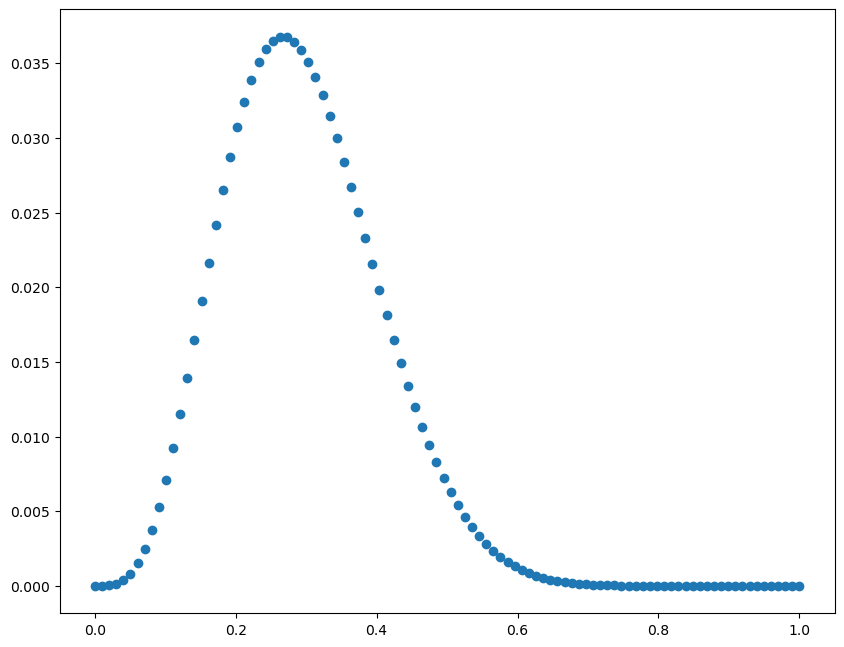

In [92]:
posterior = (1-p_grid)**11 * p_grid ** 4 * prior
posterior = posterior / sum(posterior)

expected_value = np.sum(p_grid*posterior)
print(f"Mean: {np.mean(expected_value)}")
plt.scatter(p_grid, posterior)
plt.show()

We have the same result! That was much easier. 😌 Lesson learned! 

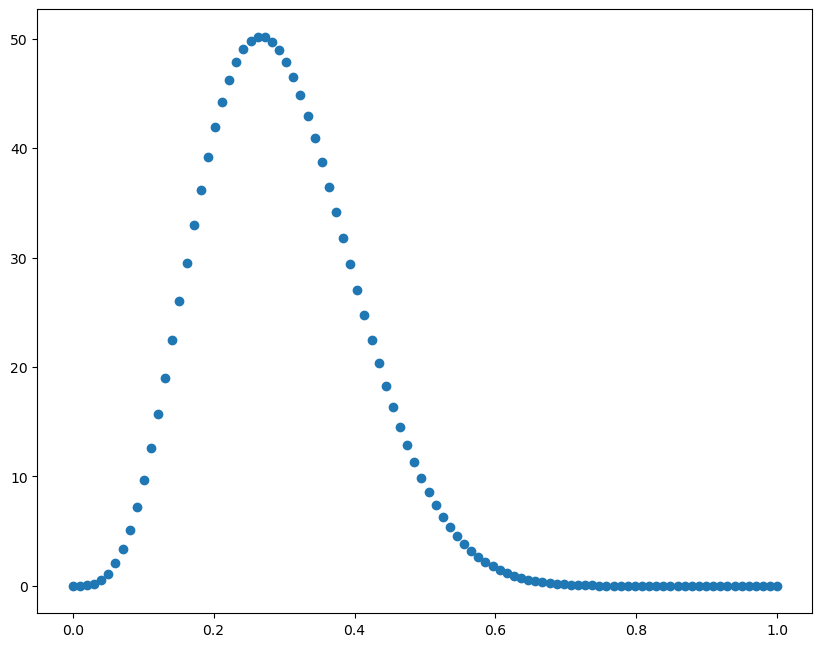

1365


In [79]:
## What if there are more ways to get that sequence, i.e. we don't know the exact order?

from math import comb

posterior = (1-p_grid)**11 * p_grid ** 4 * prior
posterior = posterior / sum(posterior)
plt.scatter(p_grid, posterior)
plt.show()

print(comb(15, 4))

## Problem 2 

Start over in 1, but now use a prior that is zero below $p=0.5$ and a constant above $p=0.5$. This corresponds to prior information that a majority of the Earth’s surface is water. What difference does the better prior make?

Mean: 0.549448180978837


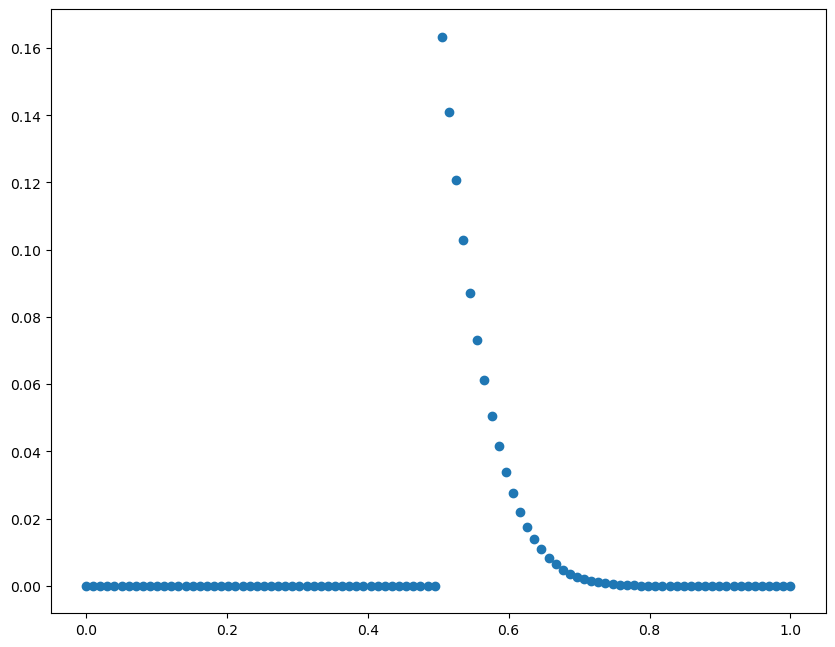

In [4]:
prior = np.piecewise(p_grid, [p_grid < 0.5, p_grid >= 0.5], [0, 1])
posterior = (1-p_grid)**11 * p_grid ** 4 * prior
posterior = posterior / sum(posterior)
expected_value = np.sum(p_grid*posterior)
print(f"Mean: {np.mean(expected_value)}")

plt.scatter(p_grid, posterior)
plt.show()

We see that this prior gives a distribution that is much closer to the true value of $p$. It's expectation value is $0.55$, which is much better than $0.30$, which is the estimate we got from a flat prior.

## Problem 3 

For the posterior distribution from 2, compute 89% percentile and HPDI intervals. Compare the widths of these intervals. Which is wider? Why? If you had only the information in the interval, what might you misunderstand about the shape of the posterior distribution?

The $x$ percentile is defined as the "central" interval containing $x%$ of the probability density. Another way to look at it is that it's the interval which has tails containing the same amount $\frac{1-x}{2}$ of probability on either side.

We'll build a function that computes this interval. Take the left (lower) boundary of the interval: the idea is to compute the cumulative sum of the distribution and find the point at which it is closest to $\frac{1-x}{2}$. The same applies to the right (upper) boundary. 

0.5050505050505051 0.6363636363636365


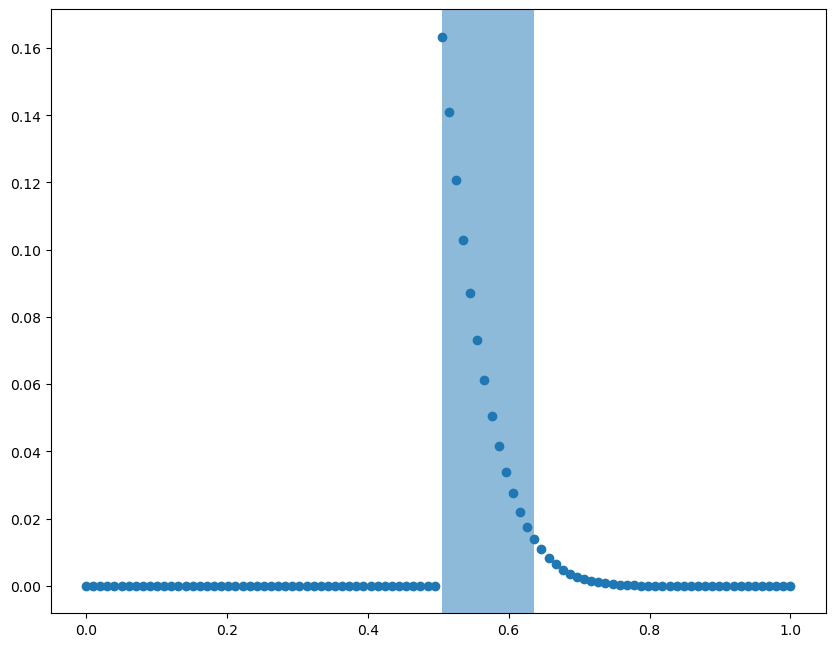

In [21]:
def percentile(data, percent):
    
    cumsum = np.cumsum(data)
    tail_mass = (1-percent)/2
    lower_boundary_index =  np.min((cumsum > tail_mass).nonzero())
    upper_boundary_index = np.min((cumsum > (percent + tail_mass)).nonzero())
    return lower_boundary_index, upper_boundary_index


lower_index, upper_index = percentile(posterior, 0.89)
print(p_grid[lower_index], p_grid[upper_index])
plt.scatter(p_grid, posterior)
plt.axvspan(p_grid[lower_index], p_grid[upper_index], alpha=0.5)
plt.show()